In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt

# example of ordinal encoding for a neural network
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
dataset_url = 'clean_csv_non_binary.csv'
df = pd.read_csv(dataset_url)
df.head()

,Unnamed: 0,PrimaryColor,PrimaryBreed,IntakeInternalStatus,ReproductiveStatusAtIntake,BreedCategory,Pet_age_category,BinaryOutcome,Sex
0,4,WHITE,PIT BULL TERRIER,NORMAL,FERTILE,Pure,Young,Deny,Male
1,51,BLACK,BORDER COLLIE,NORMAL,ALTERED,Mix,Young,Take,Female
2,69,TAN,GOLDEN RETRIEVER,NORMAL,ALTERED,Mix,Young,Take,Male
3,99,WHITE,LABRADOR RETRIEVER,NORMAL,ALTERED,Pure,Baby,Take,Female
4,103,BLACK,PIT BULL TERRIER,SICK,FERTILE,Pure,Young,Deny,Male


In [19]:
df.shape

(42822, 9)

In [20]:
df_drop = df.drop(columns=['Unnamed: 0'])

In [21]:
df_drop.isnull().values.any()

True

In [22]:
df_drop.isnull().sum().sum()

1287

In [23]:
df_drop_na = df_drop.dropna()

In [24]:
df_drop_na.isnull().sum()

PrimaryColor                  0
PrimaryBreed                  0
IntakeInternalStatus          0
ReproductiveStatusAtIntake    0
BreedCategory                 0
Pet_age_category              0
BinaryOutcome                 0
Sex                           0
dtype: int64

In [25]:
df_drop_na.isnull().values.any()

False

In [26]:
df_drop_na.shape

(41535, 8)

In [27]:
df_drop_na.dtypes

PrimaryColor                  object
PrimaryBreed                  object
IntakeInternalStatus          object
ReproductiveStatusAtIntake    object
BreedCategory                 object
Pet_age_category              object
BinaryOutcome                 object
Sex                           object
dtype: object

In [28]:
df_drop_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41535 entries, 0 to 42821
Data columns (total 8 columns):
PrimaryColor                  41535 non-null object
PrimaryBreed                  41535 non-null object
IntakeInternalStatus          41535 non-null object
ReproductiveStatusAtIntake    41535 non-null object
BreedCategory                 41535 non-null object
Pet_age_category              41535 non-null object
BinaryOutcome                 41535 non-null object
Sex                           41535 non-null object
dtypes: object(8)
memory usage: 2.9+ MB


In [29]:
# y = data.BinaryOutcome
# X = data.drop('BinaryOutcome', axis=1)

In [30]:
# Using SciKit Learn
# Encoding make column using LabelEncoder
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# df_drop_na['PrimaryColor_encoded'] = labelencoder.fit_transform(df_drop_na['PrimaryColor'])
# # Viewing few rows of make and its encoded columns
# df_drop_na[['PrimaryColor', 'PrimaryColor_encoded']].sample(20)

# df_drop_na['Sex_encoded'] = labelencoder.fit_transform(df_drop_na['Sex'])
# # Viewing few rows of make and its encoded columns
# df_drop_na[['Sex', 'Sex_encoded']].sample(20)


In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ctransformer = ColumnTransformer([("encoded_data", OneHotEncoder(sparse=False), [1,4,5,7]),])
ct_encoded_results = ctransformer.fit_transform(df_drop_na)
# Get Feature Names of Encoded columns
ctransformer.get_feature_names()

['encoded_data__x0_AFFENPINSCHER',
 'encoded_data__x0_AIREDALE TERRIER',
 'encoded_data__x0_AKITA',
 'encoded_data__x0_ALASKAN HUSKY',
 'encoded_data__x0_ALASKAN KLEE KAI',
 'encoded_data__x0_ALASKAN MALAMUTE',
 'encoded_data__x0_AMERICAN BULLDOG',
 'encoded_data__x0_AMERICAN ESKIMO',
 'encoded_data__x0_AMERICAN FOXHOUND',
 'encoded_data__x0_AMERICAN PIT BULL TERRIER',
 'encoded_data__x0_AMERICAN STAFFORDSHIRE TERRIER',
 'encoded_data__x0_ANATOLIAN SHEPHERD',
 'encoded_data__x0_AUSTRALIAN CATTLE DOG',
 'encoded_data__x0_AUSTRALIAN KELPIE',
 'encoded_data__x0_AUSTRALIAN SHEPHERD',
 'encoded_data__x0_AUSTRALIAN TERRIER',
 'encoded_data__x0_BASENJI',
 'encoded_data__x0_BASSET HOUND',
 'encoded_data__x0_BEAGLE',
 'encoded_data__x0_BEARDED COLLIE',
 'encoded_data__x0_BEAUCERON',
 'encoded_data__x0_BEDLINGTON TERRIER',
 'encoded_data__x0_BELGIAN MALINOIS',
 'encoded_data__x0_BELGIAN SHEEPDOG',
 'encoded_data__x0_BELGIAN TERVUREN',
 'encoded_data__x0_BERNESE HOUND',
 'encoded_data__x0_BERNESE

In [32]:
# Converting the numpy array into a pandas dataframe
df_ct_encoded_data = pd.DataFrame(ct_encoded_results, columns=ctransformer.get_feature_names())
# Viewing first few rows of data
df_ct_encoded_data.head()

,encoded_data__x0_AFFENPINSCHER,encoded_data__x0_AIREDALE TERRIER,encoded_data__x0_AKITA,encoded_data__x0_ALASKAN HUSKY,encoded_data__x0_ALASKAN KLEE KAI,encoded_data__x0_ALASKAN MALAMUTE,encoded_data__x0_AMERICAN BULLDOG,encoded_data__x0_AMERICAN ESKIMO,encoded_data__x0_AMERICAN FOXHOUND,encoded_data__x0_AMERICAN PIT BULL TERRIER,...,encoded_data__x0_YORKSHIRE TERRIER,encoded_data__x1_Mix,encoded_data__x1_Pure,encoded_data__x1_Two,encoded_data__x2_Adult,encoded_data__x2_Baby,encoded_data__x2_Senior,encoded_data__x2_Young,encoded_data__x3_Female,encoded_data__x3_Male
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [33]:
# Dropping dummy variables to avoid multicollinearity
df_ct_encoded_data.drop(['encoded_data__x2_Baby', 'encoded_data__x1_Two'], inplace=True, axis=1)
# Viewing few rows of data after dropping dummy varibles
df_ct_encoded_data.head()

,encoded_data__x0_AFFENPINSCHER,encoded_data__x0_AIREDALE TERRIER,encoded_data__x0_AKITA,encoded_data__x0_ALASKAN HUSKY,encoded_data__x0_ALASKAN KLEE KAI,encoded_data__x0_ALASKAN MALAMUTE,encoded_data__x0_AMERICAN BULLDOG,encoded_data__x0_AMERICAN ESKIMO,encoded_data__x0_AMERICAN FOXHOUND,encoded_data__x0_AMERICAN PIT BULL TERRIER,...,encoded_data__x0_WIRE-HAIRED POINTING GRIFFON,encoded_data__x0_WOLF HYBRID,encoded_data__x0_YORKSHIRE TERRIER,encoded_data__x1_Mix,encoded_data__x1_Pure,encoded_data__x2_Adult,encoded_data__x2_Senior,encoded_data__x2_Young,encoded_data__x3_Female,encoded_data__x3_Male
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [34]:
# To perform OneHotEncoder for all Categorical columns
# Categorical columns present in the dataframe
categorical_cols = df_drop_na.columns[df_drop_na.dtypes==object].tolist()
categorical_cols

['PrimaryColor',
 'PrimaryBreed',
 'IntakeInternalStatus',
 'ReproductiveStatusAtIntake',
 'BreedCategory',
 'Pet_age_category',
 'BinaryOutcome',
 'Sex']

In [35]:
# column_trans = make_column_transformer(
#     (OneHotEncoder(), ['Sex','Pet_age_category','PrimaryColor', 'BinaryOutcome']),
#     remainder='passthrough')
# column_trans = make_column_transformer(
#     (OneHotEncoder(), ['PrimaryColor']),
#     remainder='passthrough')

In [36]:
# Performing LabelEncoding for remaining all categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_drop_na[categorical_cols] = df_drop_na[categorical_cols].apply(lambda col: le.fit_transform(col))
# Viewing first few rows of data
df_drop_na[categorical_cols].head(10)

/Users/spencer.lafarge/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,PrimaryColor,PrimaryBreed,IntakeInternalStatus,ReproductiveStatusAtIntake,BreedCategory,Pet_age_category,BinaryOutcome,Sex
0,38,146,15,1,1,3,0,1
1,2,33,15,0,0,3,1,0
2,36,97,15,0,0,3,1,1
3,38,117,15,0,1,1,1,0
4,2,146,22,1,1,3,0,1
5,38,182,15,1,0,1,0,0
6,13,146,0,1,1,2,0,0
7,13,203,15,1,0,3,0,1
8,2,18,6,1,0,3,0,1
9,14,147,15,0,0,0,0,0


In [37]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Female': 0, 'Male': 1}


In [38]:
# from sklearn.preprocessing import OneHotEncoder
# onehotencoder = OneHotEncoder(sparse=False)
# onehotencoder.fit_transform(df_drop_na[categorical_cols])

In [39]:
# Define X and y
X = df_drop_na.drop(['BinaryOutcome'], axis="columns")
y = df_drop_na[['BinaryOutcome']]

In [40]:
X.shape

(41535, 7)

In [41]:
y.shape

(41535, 1)

In [42]:
##Neural Network - Keras

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
X_scaler = StandardScaler().fit(X_train)

In [46]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [47]:
from tensorflow.keras.utils import to_categorical

In [48]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [49]:
model = Sequential()
model.add(Dense(units=200, activation='relu', input_dim=7))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [50]:
# # Define the Keras TensorBoard callback.
# logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)



In [51]:
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               1600      
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 402       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 6         
Total params: 82,408
Trainable params: 82,408
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
 - 8s - loss: 0.5685 - accuracy: 0.6841
Epoch 2/1000
 - 6s - loss: 0.5553 - accuracy: 0.6890
Epoch 3/1000
 - 6s - loss: 0.5521 - accuracy: 0.6979
Epoch 4/1000
 - 6s - loss: 0.5490 - accuracy: 0.6979
Epoch 5/1000
 - 7s - loss: 0.5455 - accuracy: 0.7057
Epoch 6/1000
 - 7s - loss: 0.5406 - accuracy: 0.7091
Epoch 7/1000
 - 8s - loss: 0.5363 - accuracy: 0.7108
Epoch 8/1000
 - 7s - loss: 0.5346 - accuracy: 0.7134
Epoch 9/1000
 - 7s - loss: 0.5320 - accuracy: 0.7168
Epoch 10/1000
 - 7s - loss: 0.5315 - accuracy: 0.7144
Epoch 11/1000
 - 7s - loss: 0.5304 - accuracy: 0.7153
Epoch 12/1000
 - 8s - loss: 0.5292 - accuracy: 0.7141
Epoch 13/1000
 - 8s - loss: 0.5288 - accuracy: 0.7164
Epoch 14/1000
 - 8s - loss: 0.5281 - accuracy: 0.7164
Epoch 15/1000
 - 8s - loss: 0.5270 - accuracy: 0.7185
Epoch 16/1000
 - 10s - loss: 0.5257 - accuracy: 0.7186
Epoch 17/1000
 - 8s - loss: 0.5251 - accuracy: 0.7167
Epoch 18/1000
 - 8s - loss: 0.5241 - accuracy: 0.7188
Epoch 19/1000
 - 8s - loss: 0.5237 -

 - 13s - loss: 0.4756 - accuracy: 0.7523
Epoch 151/1000
 - 12s - loss: 0.4758 - accuracy: 0.7512
Epoch 152/1000
 - 15s - loss: 0.4751 - accuracy: 0.7513
Epoch 153/1000
 - 12s - loss: 0.4760 - accuracy: 0.7494
Epoch 154/1000
 - 12s - loss: 0.4750 - accuracy: 0.7527
Epoch 155/1000
 - 11s - loss: 0.4741 - accuracy: 0.7534
Epoch 156/1000
 - 17s - loss: 0.4755 - accuracy: 0.7518
Epoch 157/1000
 - 10s - loss: 0.4738 - accuracy: 0.7522
Epoch 158/1000
 - 9s - loss: 0.4732 - accuracy: 0.7526
Epoch 159/1000
 - 10s - loss: 0.4728 - accuracy: 0.7503
Epoch 160/1000
 - 11s - loss: 0.4744 - accuracy: 0.7525
Epoch 161/1000
 - 11s - loss: 0.4727 - accuracy: 0.7521
Epoch 162/1000
 - 10s - loss: 0.4743 - accuracy: 0.7528
Epoch 163/1000
 - 18s - loss: 0.4722 - accuracy: 0.7551
Epoch 164/1000
 - 14s - loss: 0.4722 - accuracy: 0.7524
Epoch 165/1000
 - 10s - loss: 0.4728 - accuracy: 0.7528
Epoch 166/1000
 - 12s - loss: 0.4716 - accuracy: 0.7548
Epoch 167/1000
 - 17s - loss: 0.4736 - accuracy: 0.7517
Epoch 16

 - 10s - loss: 0.4561 - accuracy: 0.7644
Epoch 298/1000
 - 12s - loss: 0.4556 - accuracy: 0.7650
Epoch 299/1000
 - 12s - loss: 0.4555 - accuracy: 0.7648
Epoch 300/1000
 - 10s - loss: 0.4569 - accuracy: 0.7631
Epoch 301/1000
 - 10s - loss: 0.4555 - accuracy: 0.7642
Epoch 302/1000
 - 9s - loss: 0.4553 - accuracy: 0.7640
Epoch 303/1000
 - 9s - loss: 0.4544 - accuracy: 0.7637
Epoch 304/1000
 - 12s - loss: 0.4549 - accuracy: 0.7641
Epoch 305/1000
 - 11s - loss: 0.4540 - accuracy: 0.7628
Epoch 306/1000
 - 11s - loss: 0.4545 - accuracy: 0.7642
Epoch 307/1000
 - 10s - loss: 0.4558 - accuracy: 0.7629
Epoch 308/1000
 - 10s - loss: 0.4560 - accuracy: 0.7637
Epoch 309/1000
 - 10s - loss: 0.4548 - accuracy: 0.7647
Epoch 310/1000
 - 11s - loss: 0.4527 - accuracy: 0.7665
Epoch 311/1000
 - 9s - loss: 0.4538 - accuracy: 0.7650
Epoch 312/1000
 - 9s - loss: 0.4536 - accuracy: 0.7628
Epoch 313/1000
 - 10s - loss: 0.4539 - accuracy: 0.7652
Epoch 314/1000
 - 12s - loss: 0.4538 - accuracy: 0.7642
Epoch 315/1

Epoch 444/1000
 - 9s - loss: 0.4432 - accuracy: 0.7726
Epoch 445/1000
 - 9s - loss: 0.4428 - accuracy: 0.7726
Epoch 446/1000
 - 9s - loss: 0.4435 - accuracy: 0.7735
Epoch 447/1000
 - 9s - loss: 0.4442 - accuracy: 0.7728
Epoch 448/1000
 - 9s - loss: 0.4423 - accuracy: 0.7726
Epoch 449/1000
 - 10s - loss: 0.4447 - accuracy: 0.7705
Epoch 450/1000
 - 10s - loss: 0.4461 - accuracy: 0.7704
Epoch 451/1000
 - 9s - loss: 0.4434 - accuracy: 0.7720
Epoch 452/1000
 - 9s - loss: 0.4428 - accuracy: 0.7733
Epoch 453/1000
 - 10s - loss: 0.4456 - accuracy: 0.7696
Epoch 454/1000
 - 10s - loss: 0.4450 - accuracy: 0.7712
Epoch 455/1000
 - 10s - loss: 0.4417 - accuracy: 0.7740
Epoch 456/1000
 - 10s - loss: 0.4421 - accuracy: 0.7722
Epoch 457/1000
 - 10s - loss: 0.4430 - accuracy: 0.7711
Epoch 458/1000
 - 10s - loss: 0.4439 - accuracy: 0.7740
Epoch 459/1000
 - 10s - loss: 0.4429 - accuracy: 0.7740
Epoch 460/1000
 - 10s - loss: 0.4454 - accuracy: 0.7693
Epoch 461/1000
 - 9s - loss: 0.4417 - accuracy: 0.7724


Epoch 591/1000
 - 10s - loss: 0.4352 - accuracy: 0.7783
Epoch 592/1000
 - 10s - loss: 0.4354 - accuracy: 0.7785
Epoch 593/1000
 - 10s - loss: 0.4381 - accuracy: 0.7731
Epoch 594/1000
 - 11s - loss: 0.4350 - accuracy: 0.7784
Epoch 595/1000
 - 10s - loss: 0.4384 - accuracy: 0.7757
Epoch 596/1000
 - 10s - loss: 0.4374 - accuracy: 0.7756
Epoch 597/1000
 - 10s - loss: 0.4358 - accuracy: 0.7764
Epoch 598/1000
 - 10s - loss: 0.4364 - accuracy: 0.7769
Epoch 599/1000
 - 11s - loss: 0.4373 - accuracy: 0.7752
Epoch 600/1000
 - 10s - loss: 0.4360 - accuracy: 0.7766
Epoch 601/1000
 - 11s - loss: 0.4368 - accuracy: 0.7781
Epoch 602/1000
 - 10s - loss: 0.4353 - accuracy: 0.7794
Epoch 603/1000
 - 9s - loss: 0.4372 - accuracy: 0.7779
Epoch 604/1000
 - 10s - loss: 0.4374 - accuracy: 0.7768
Epoch 605/1000
 - 10s - loss: 0.4360 - accuracy: 0.7775
Epoch 606/1000
 - 10s - loss: 0.4372 - accuracy: 0.7759
Epoch 607/1000
 - 10s - loss: 0.4344 - accuracy: 0.7788
Epoch 608/1000
 - 10s - loss: 0.4350 - accuracy: 

Epoch 738/1000
 - 9s - loss: 0.4332 - accuracy: 0.7798
Epoch 739/1000
 - 9s - loss: 0.4309 - accuracy: 0.7816
Epoch 740/1000
 - 9s - loss: 0.4321 - accuracy: 0.7793
Epoch 741/1000
 - 9s - loss: 0.4305 - accuracy: 0.7798
Epoch 742/1000
 - 10s - loss: 0.4309 - accuracy: 0.7800
Epoch 743/1000
 - 10s - loss: 0.4318 - accuracy: 0.7811
Epoch 744/1000
 - 9s - loss: 0.4314 - accuracy: 0.7815
Epoch 745/1000
 - 10s - loss: 0.4326 - accuracy: 0.7792
Epoch 746/1000
 - 11s - loss: 0.4296 - accuracy: 0.7818
Epoch 747/1000
 - 14s - loss: 0.4291 - accuracy: 0.7805
Epoch 748/1000
 - 10s - loss: 0.4323 - accuracy: 0.7800
Epoch 749/1000
 - 10s - loss: 0.4317 - accuracy: 0.7785
Epoch 750/1000
 - 11s - loss: 0.4298 - accuracy: 0.7798
Epoch 751/1000
 - 11s - loss: 0.4306 - accuracy: 0.7796
Epoch 752/1000
 - 10s - loss: 0.4295 - accuracy: 0.7814
Epoch 753/1000
 - 10s - loss: 0.4274 - accuracy: 0.7821
Epoch 754/1000
 - 10s - loss: 0.4307 - accuracy: 0.7811
Epoch 755/1000
 - 10s - loss: 0.4315 - accuracy: 0.78

KeyboardInterrupt: 

In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
train = df_drop_na

In [ ]:
# Gathering columns for which cardinality isn't the same into a list in order to make charts
cols_list = []
for col in train.columns:
     if train[col].dtype == "object" and (train[col].nunique()-test[col].nunique()) != 0:
        cols_list.append(col)
        
# looking at values in these columns
for l in cols_list:
    sns.catplot(x=l, hue='Status', kind='count', data=combo)
    plt.xticks(rotation=45)
    
plt.show()

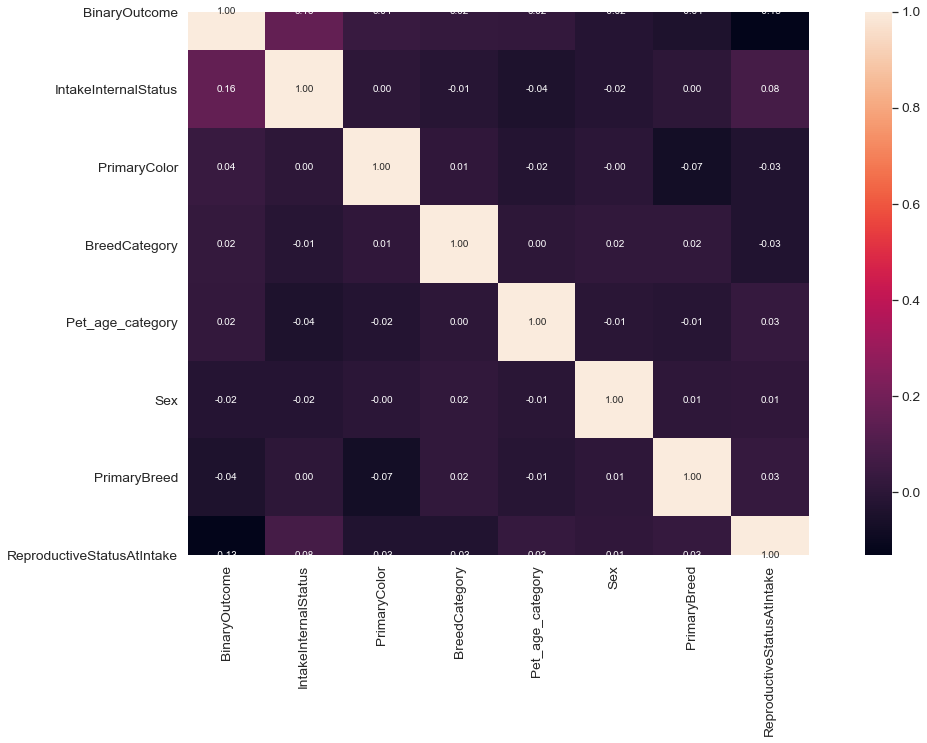

In [65]:
corrmat = train.corr()
plt.figure(figsize=(20,10))
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'BinaryOutcome')['BinaryOutcome'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [54]:
import pandas as pd
from deployml.sklearn.models.logistic_regression import LogisticRegressionBase

In [55]:
train = df_drop_na

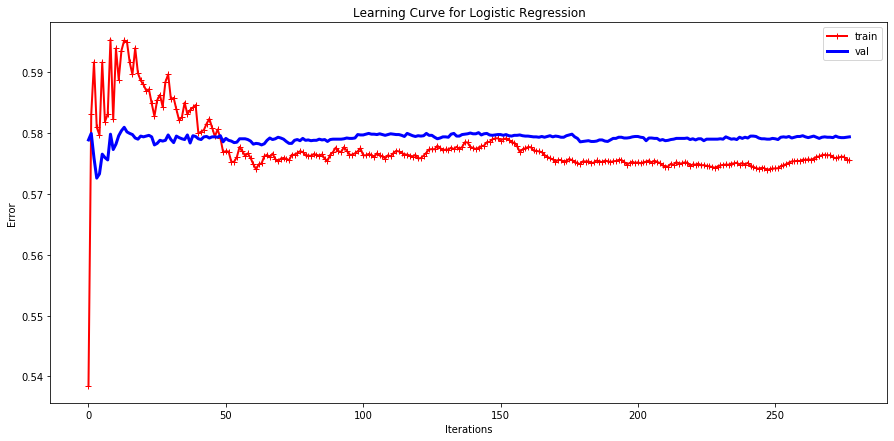

In [59]:
log = LogisticRegressionBase()

log.data = train

log.outcome_pointer = 'BinaryOutcome'
log.plot_learning_curve(scale=True, batch_size=100)
log.show_learning_curve()

In [60]:
log.evaluate_outcome()

              precision    recall  f1-score   support

           0       0.68      0.97      0.80      9316
           1       0.21      0.02      0.03      4391

    accuracy                           0.66     13707
   macro avg       0.44      0.49      0.41     13707
weighted avg       0.53      0.66      0.55     13707



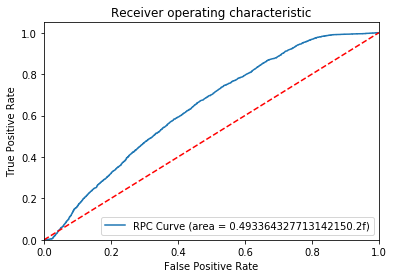

In [74]:
log.show_roc_curve()

In [16]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_train, y_test)))
# print('Precision Score : ' + str(precision_score(y_test,y_pred)))
# print('Recall Score : ' + str(recall_score(y_test,y_pred)))
# print('F1 Score : ' + str(f1_score(y_test,y_pred)))

# #Dummy Classifier Confusion matrix
# from sklearn.metrics import confusion_matrix
# print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))


NameError: name 'y_train' is not defined